In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv(r'D:\OneDrive - Manipal Global Education Services Pvt Ltd\Official\MGAIT\Datasets\ML Datasets\LEAD.csv')
data.head()

OWN_HOUSE  OWN_CAR  HOUSE_LOAN  CAR_LOAN  SMOKER  HEART_DISEASE  DIABETES  \
0          1        0           0         0       0              0         1   
1          0        0           0         0       0              0         1   
2          0        0           0         0       0              0         1   
3          0        0           0         0       0              0         0   
4          1        0           0         0       1              0         0   

   MARITAL_STATUS  CHILDREN  OTHER_INSURANCE  PURCHASE  
0               1         1                1         1  
1               1         1                0         0  
2               1         2                0         0  
3               1         1                0         0  
4               0         0                1         0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20742 entries, 0 to 20741
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OWN_HOUSE        20742 non-null  int64
 1   OWN_CAR          20742 non-null  int64
 2   HOUSE_LOAN       20742 non-null  int64
 3   CAR_LOAN         20742 non-null  int64
 4   SMOKER           20742 non-null  int64
 5   HEART_DISEASE    20742 non-null  int64
 6   DIABETES         20742 non-null  int64
 7   MARITAL_STATUS   20742 non-null  int64
 8   CHILDREN         20742 non-null  int64
 9   OTHER_INSURANCE  20742 non-null  int64
 10  PURCHASE         20742 non-null  int64
dtypes: int64(11)
memory usage: 1.7 MB


In [4]:
data.describe()

OWN_HOUSE       OWN_CAR    HOUSE_LOAN      CAR_LOAN        SMOKER  \
count  20742.000000  20742.000000  20742.000000  20742.000000  20742.000000   
mean       0.336033      0.166715      0.038521      0.037219      0.229968   
std        0.472362      0.372730      0.192455      0.189303      0.420822   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       HEART_DISEASE      DIABETES  MARITAL_STATUS      CHILDREN  \
count   20742.000000  20742.000000    20742.000000  20742.000000   
mean        0.034664      0.310722        0.955067      1.244673   
std         0.182932      0.462800        0.207162      0.696347   
min         0.000000      0.000000        0.000000      0.000000   
25%         0.000000      0.000000        1.000000      1.000000   
50%         0.000000      0.000000        1.000000      1.000000   
75%         0.000000      1.000000        1.000000      2.000000   
max         1.000000      1.000000        1.000000      2.000000   

       OTHER_INSURANCE      PURCHASE  
count     20742.000000  20742.000000  
mean          0.280494      0.085768  
std           0.449251      0.280028  
min           0.000000      0.000000  
25%           0.000000      0.000000  
50%           0.000000      0.000000  
75%           1.000000      0.000000  
max           1.000000      1.000000

In [5]:
data.PURCHASE.value_counts(normalize=True)

0    0.914232
1    0.085768
Name: PURCHASE, dtype: float64

Now, we need to check whether there is any missing value in the dataset or not. For that we will be using the following code.

In [6]:
data.isnull().sum(axis = 0)

OWN_HOUSE          0
OWN_CAR            0
HOUSE_LOAN         0
CAR_LOAN           0
SMOKER             0
HEART_DISEASE      0
DIABETES           0
MARITAL_STATUS     0
CHILDREN           0
OTHER_INSURANCE    0
PURCHASE           0
dtype: int64

In [7]:
X = data[['OWN_HOUSE', 'OWN_CAR', 'HOUSE_LOAN', 'CAR_LOAN',
                   'SMOKER', 'HEART_DISEASE', 'DIABETES', 'MARITAL_STATUS', 'CHILDREN', 'OTHER_INSURANCE']]

y = np.array(data[['PURCHASE']])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=25)

Now we will be fitting the Decision Tree model on the training dataset.

In [9]:
dectree = DecisionTreeClassifier(max_depth=3)
dectree_train = dectree.fit(X_train, y_train)
y_pred = dectree_train.predict(X_test)

feature importance = 
                (proportion_of_samples_at_parent\*impurity_at_parent) -   (proportion_left_child_samples\*impurity_left)-(proportion_right_child_samples
                *impurity_right)

In [10]:
dectree_train.feature_importances_

array([0.55345115, 0.        , 0.        , 0.        , 0.12016516,
       0.06699081, 0.        , 0.        , 0.21161449, 0.04777839])

In [11]:
pd.Series(dectree_train.feature_importances_ ,index = X.columns).sort_values(ascending=False)

OWN_HOUSE          0.553451
CHILDREN           0.211614
SMOKER             0.120165
HEART_DISEASE      0.066991
OTHER_INSURANCE    0.047778
MARITAL_STATUS     0.000000
DIABETES           0.000000
CAR_LOAN           0.000000
HOUSE_LOAN         0.000000
OWN_CAR            0.000000
dtype: float64

In [ ]:
test_pred = pd.DataFrame(np.hstack((X_test,y_test,y_pred.reshape(-1,1))),columns=['OWN_HOUSE', 'OWN_CAR', 'HOUSE_LOAN', 'CAR_LOAN',
                   'SMOKER', 'HEART_DISEASE', 'DIABETES', 'MARITAL_STATUS', 'CHILDREN', 'OTHER_INSURANCE','y_test','y_pred'])
test_pred.head()

In [ ]:
test_pred[['y_test','y_pred']].head(20)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision tree accuracy Score=",accuracy_score(y_test,y_pred)*100)

Decision tree accuracy Score= 91.58097686375322


In [16]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[2846    5]
 [ 257    4]]


In [17]:
proab = dectree_train.predict_proba(X_test)
proab

array([[0.92105263, 0.07894737],
       [0.98386754, 0.01613246],
       [0.98386754, 0.01613246],
       ...,
       [1.        , 0.        ],
       [0.92105263, 0.07894737],
       [0.98386754, 0.01613246]])

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
X_train.shape

In [13]:
cols = ['OWN_HOUSE', 'OWN_CAR', 'HOUSE_LOAN', 'CAR_LOAN',
                   'SMOKER', 'HEART_DISEASE', 'DIABETES', 'MARITAL_STATUS', 'CHILDREN', 'OTHER_INSURANCE']

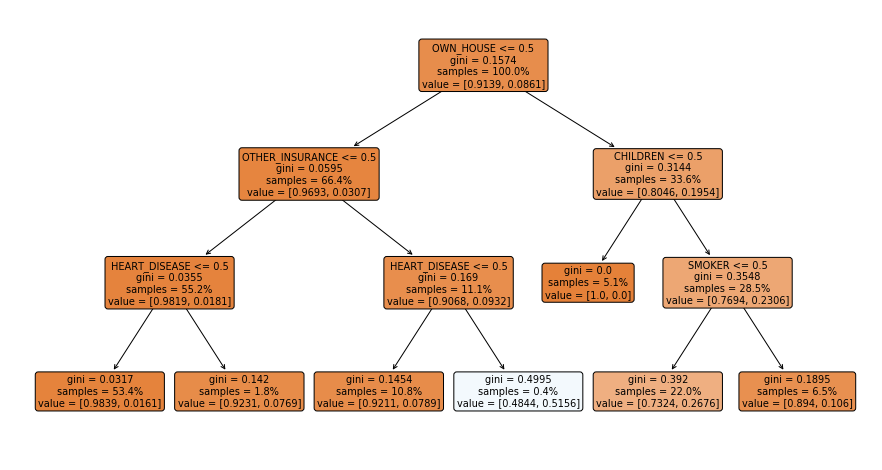

In [14]:
plt.figure(figsize=(15,8))
tree.plot_tree(dectree_train, feature_names=cols, filled=True,precision=4,
               proportion=True,rounded=True)
plt.show()

Suppose we get a new observation of a customer who does not:
1. own a house
2. have a heart disease
3. have any other insurance

and the customer has:
1. car
2. house loan
3. car loan
4. smoker
5. diabetes
6. married
7. one children

In [18]:
sample_df = pd.DataFrame([[0,1,1,1,1,0,1,1,1,0]],columns = ['OWN_HOUSE', 'OWN_CAR', 'HOUSE_LOAN', 'CAR_LOAN',
                   'SMOKER', 'HEART_DISEASE', 'DIABETES', 'MARITAL_STATUS', 'CHILDREN', 'OTHER_INSURANCE'])
sample_df

OWN_HOUSE  OWN_CAR  HOUSE_LOAN  CAR_LOAN  SMOKER  HEART_DISEASE  DIABETES  \
0          0        1           1         1       1              0         1   

   MARITAL_STATUS  CHILDREN  OTHER_INSURANCE  
0               1         1                0

In [19]:
dectree_train.predict(sample_df)

array([0], dtype=int64)

for this customer, he is not going to purchase the item

In [20]:
dectree_train.predict_proba(sample_df)

array([[0.98386754, 0.01613246]])

The probability of making this claim is 98%

## Hyperparameter tuning

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
clf = DecisionTreeClassifier(random_state=80)
params = {'max_depth':list(range(1,11)), 'criterion':['gini', 'entropy']}
cv_model = GridSearchCV(clf, param_grid = params,scoring='roc_auc')
cv_model.fit(X_train,y_train)
print(cv_model.best_params_)

{'criterion': 'gini', 'max_depth': 5}


In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

In [24]:
dectreeT = DecisionTreeClassifier(max_depth=5, criterion='gini')
dectree_trainT = dectreeT.fit(X_train, y_train)
y_predT = dectree_trainT.predict(X_test)

In [25]:
print("Decision tree accuracy Score=",accuracy_score(y_test,y_predT)*100)

Decision tree accuracy Score= 91.61311053984575


In [41]:
cm = confusion_matrix(y_test,y_predT)
print(cm)

[[2840   11]
 [ 250   11]]


In [ ]:
#Actually 0, but predicted as 0: TN
TN = cm[0,0]
print("True Negative: ",TN)

In [ ]:
#Actually 0, but predicted as 1 : FP
FP = cm[0,1]
print("False Positive: ",FP)

In [ ]:
#Actually 1, but predicted as 0 : FN
FN = cm[1,0]
print("False Negative: ",FN)

In [ ]:
#Actually 1, but predicted as 1 : TP
TP = cm[1,1]
print("True Positive: ",TP)

In [ ]:
#Accuracy = Total Number of correct predictions/Total Number of observations
#orAccuracy = (TN+TP)/Total Number of observations
n=len(y_test)
(TN+TP)/n

In [ ]:
# recall orTPR or Sensitivity : TP/(TP+FN)
recall = TP/(TP+FN)
recall

In [ ]:
#Specificity : TN/(TN+FP)
specificity = TN/(TN+FP)
specificity

In [ ]:
#FPR = 1-specificity or FP/(FP+TN)
FPR = 1-specificity
FPR

In [ ]:
precision = TP/(TP+FP)
precision

In [21]:
from sklearn.metrics import f1_score,roc_curve,auc

In [ ]:
f1_score(y_test,y_predT)

In [ ]:
(2*precision*recall)/(precision+recall)

In [26]:
probs = dectree_trainT.predict_proba(X_test)

In [27]:
probs

array([[0.89444053, 0.10555947],
       [0.97082133, 0.02917867],
       [0.98548651, 0.01451349],
       ...,
       [1.        , 0.        ],
       [0.89444053, 0.10555947],
       [0.98548651, 0.01451349]])

In [28]:
prob_positive = probs[:,1]

In [29]:
fpr, tpr, threshold = roc_curve(y_test,prob_positive)

In [30]:
ftt = pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])
ftt.head()

threshold       fpr       tpr
0   1.562500  0.000000  0.000000
1   0.562500  0.000351  0.011494
2   0.557377  0.003858  0.042146
3   0.473684  0.004911  0.045977
4   0.424403  0.018941  0.157088

In [31]:
roc_auc = auc(fpr,tpr)
roc_auc

0.8560826274574627

In [32]:
def compute_auc(test, train_instance):
    probs = train_instance.predict_proba(test)
    prob_positive = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test,prob_positive)
    roc_auc = auc(fpr,tpr)
    return roc_auc,fpr,tpr

In [33]:
roc_auc, fpr, tpr = compute_auc(X_test,dectree_trainT)
roc_auc

0.8560826274574627

In [34]:
import matplotlib.pyplot as plt

In [35]:
def plot_ROC(roc,fpr,tpr):
    plt.title("receiver Operating Charecteristc")
    plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
    plt.ylabel('True positive Rate')
    plt.xlabel('False positive Rate')
    plt.show()

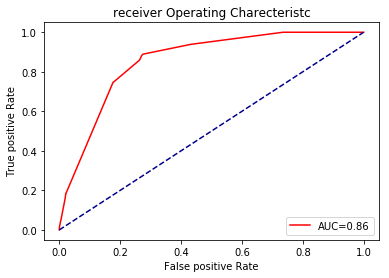

In [36]:
plot_ROC(roc_auc,fpr,tpr)

In this scenario :
- FP means a customer is actually not a prospective customer but the model predicted as a prospective customer - Type-1 error
- FN means a customer is actually a prospective customer but the model predicted it as not a prospective customer
since there exists a tradeoff between FN and FP

In order to, not to lose out on a prospective customer, False negatives are to be minimized with a marginal FP is acceptable.

Hence from the ROC curve choose that threshold which results in higher TPR which inturn minimizes the FN's

In [37]:
ftt

threshold       fpr       tpr
0    1.562500  0.000000  0.000000
1    0.562500  0.000351  0.011494
2    0.557377  0.003858  0.042146
3    0.473684  0.004911  0.045977
4    0.424403  0.018941  0.157088
5    0.421875  0.021396  0.183908
6    0.363636  0.021747  0.183908
7    0.268853  0.176780  0.747126
8    0.107143  0.180638  0.750958
9    0.105559  0.263066  0.858238
10   0.076923  0.265872  0.865900
11   0.065789  0.270431  0.881226
12   0.054054  0.274290  0.888889
13   0.029179  0.431778  0.938697
14   0.014513  0.735181  1.000000
15   0.000000  1.000000  1.000000

In [38]:
prob_positive>0.1055

array([ True, False, False, ..., False,  True, False])

In [39]:
new_pred = (prob_positive>0.1055).astype("int")
new_pred

array([1, 0, 0, ..., 0, 1, 0])

In [40]:
cm = confusion_matrix(y_test,new_pred)
cm

array([[2101,  750],
       [  37,  224]], dtype=int64)

Conslusion : With a threshold of 0.1055 we have achieved to reduce the False negative to a greater extent

In [ ]:
### Compare the Results with Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_predict = logreg.predict(X_test)
acc = accuracy_score(y_test,y_predict)
cm = confusion_matrix(y_test,y_predict)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
print(acc)
print(cm)

0.9158097686375322
[[2835   16]
 [ 246   15]]


In [45]:
f1_score(y_test,y_predict)

0.10273972602739725

In [46]:
roc_auc,fpr,tpr = compute_auc(X_test,logreg)
roc_auc

0.8546399663491064

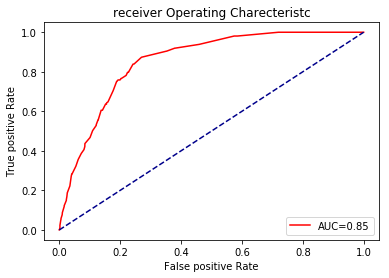

In [47]:
plot_ROC(roc_auc,fpr,tpr)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [ ]:
#Create a Random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train,y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
f1_score(y_test,y_pred)

In [ ]:
roc_auc, tpr, fpr = compute_auc(X_test,rf)
roc_auc

In [ ]:
#Fit A Gradient boosting
gb=GradientBoostingClassifier(n_estimators=500, random_state=0)
gb.fit(X_train,y_train)
gb.score(X_test,y_test)

In [ ]:
y_pred = gb.predict(X_test)

In [ ]:
f1_score(y_test,y_pred)

In [ ]:
roc_auc, tpr, fpr = compute_auc(X_test,gb)
roc_auc